<a href="https://colab.research.google.com/github/Wickstrom/ssl-summer-school-dtu/blob/main/SecretBinaryMessage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

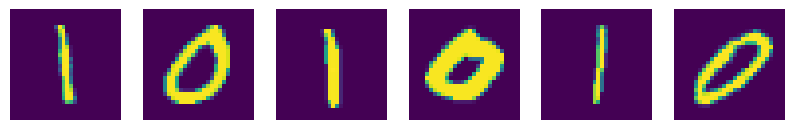

In [ ]:
#@title generate secret message (this takes a little while).

indices_of_secret_message = [740, 192, 1009, 394, 831, 481, 335, 1015, 1025, 166, 747, 361, 32, 142, 962, 1006, 333, 398, 1022, 178, 868, 292, 734, 64, 147, 377, 236, 347, 773, 594, 446, 795, 849, 304, 388, 588, 710, 171, 622, 517, 716, 534, 977, 513, 16, 605, 1021, 796, 196, 909, 626, 152, 142, 716, 1004, 515, 112, 1000, 68, 388, 198, 228, 486, 509, 629, 854, 149, 12, 776, 695, 940, 748, 146, 995, 730, 749, 819, 561, 511, 377, 97, 467, 637, 478, 835, 900, 990, 320, 365, 841, 749, 86, 987, 173, 365, 362, 477, 484, 646, 565, 168, 893, 789, 915, 577, 562, 616, 66, 160, 729, 863, 427, 326, 880, 373, 153, 32, 155, 350, 857, 866, 652, 109, 867, 91, 384, 1010, 571, 307, 839, 179, 142, 383, 672, 918, 333, 273, 572, 22, 854, 70, 751, 50, 247, 112, 362, 381, 638, 923, 892, 162, 656, 1011, 266, 931, 620, 447, 567, 392, 140, 769, 669, 802, 372, 730, 661, 739, 921, 572, 1020, 324, 553, 989, 478, 437, 1031, 718, 320, 997, 419, 365, 892, 589, 908, 328, 523, 993, 748, 39, 689, 873, 775, 179, 477, 909, 791, 163, 670, 121, 54, 172, 362, 311, 984, 947, 475, 696, 688, 948, 753, 875, 500, 146, 412, 943, 938, 326, 157, 1026, 268, 348, 237, 266, 365, 548, 874, 225, 353, 475, 421, 532, 949, 932, 800, 406, 1025, 178, 770, 935, 860, 742, 333, 839, 112, 28, 950, 691, 666, 53, 750, 347, 914, 567, 684, 149, 533, 831, 188, 756, 965, 992, 90, 493, 693, 705, 286, 70, 1044, 57, 192, 385, 22, 18, 736, 668, 847, 363, 862, 625, 680, 511, 775, 451, 632, 532, 993, 813, 918, 804, 490, 352, 522, 338, 761, 597, 899, 40, 910, 714, 698, 281, 1044, 866, 403, 383, 1043, 314, 265, 381, 896, 225, 277, 108, 323, 413, 581, 799, 408, 1049, 885, 161, 810, 707, 522, 775, 942, 395, 411, 847, 226, 507, 289, 301, 364, 109, 411, 1008, 575, 417, 821, 457, 314, 453, 583, 974, 131, 18, 705, 417, 723, 1023, 800, 388, 485, 472, 275, 941, 552, 778, 1043, 121, 332, 969, 203, 858, 746, 520, 453, 1047, 379, 339, 400, 702, 380, 195, 188, 379, 188, 696, 677, 662, 160, 945, 873, 835, 633, 638, 450, 715, 22, 184, 837, 629, 1021, 673, 302, 941, 38, 416, 853, 916, 55, 1036, 49, 34, 179, 168, 506, 122, 290, 193, 4, 6, 694, 610, 144, 12, 479, 155, 550, 261, 765, 408, 371, 454, 99, 392, 988, 697, 271, 973, 912, 62, 622, 891, 727, 369, 653, 852, 898, 606, 827, 911, 131, 878, 898, 548, 219, 617, 902, 235, 722, 798, 528, 930, 839, 971, 767, 47, 495, 354, 487, 691, 866, 454, 538, 880, 937, 722, 595, 521, 472, 800, 517, 1025, 469, 638, 884, 332, 638, 721, 897, 967, 1038, 490, 813, 88, 754, 152, 788, 1007, 830, 694, 288, 471, 691, 714, 273, 669, 75, 28, 129, 101, 306, 584, 969, 193, 674, 596, 248, 207, 703, 728, 162, 346, 57, 385, 636, 772, 521, 110, 687, 548, 763, 413, 935, 814, 315, 132, 691, 493, 968, 520, 720, 798, 351, 842, 460, 1021, 765, 794, 244, 556, 728, 914, 757, 589, 616, 503, 98, 111, 509, 347]

import torch

from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader, TensorDataset

training_data = MNIST('/sample_data/', train=True, download=True, transform=ToTensor())
all_test_data = MNIST('/sample_data/', train=False, download=True, transform=ToTensor())
validation_data, test_data = torch.utils.data.random_split(all_test_data, [5000, 5000])

training_loader = DataLoader(training_data, shuffle=False, batch_size=1)
validation_loader = DataLoader(validation_data, shuffle=False, batch_size=1)
test_loader = DataLoader(test_data, shuffle=False, batch_size=1)

binary_training_images = []
binary_training_labels = []

binary_validation_images = []
binary_validation_labels = []

binary_test_images = []
binary_test_labels = []

for x, y in training_loader:
    if y.item() == 0:
        binary_training_images.append(x)
        binary_training_labels.append(y)

for x, y in training_loader:
    if y.item() == 1:
        binary_training_images.append(x)
        binary_training_labels.append(y)

for x, y in validation_loader:
    if y.item() == 0:
        binary_validation_images.append(x)
        binary_validation_labels.append(y)

for x, y in validation_loader:
    if y.item() == 1:
        binary_validation_images.append(x)
        binary_validation_labels.append(y)

for x, y in test_loader:
    if y.item() == 0:
        binary_test_images.append(x)
        binary_test_labels.append(y)

for x, y in test_loader:
    if y.item() == 1:
        binary_test_images.append(x)
        binary_test_labels.append(y)

binary_training_data = TensorDataset(torch.cat(binary_training_images), torch.cat(binary_training_labels))
binary_validation_data = TensorDataset(torch.cat(binary_validation_images), torch.cat(binary_validation_labels))
binary_test_data = TensorDataset(torch.cat(binary_test_images), torch.cat(binary_test_labels))

binary_training_loader = DataLoader(binary_training_data, shuffle=True, batch_size=100)
binary_validation_loader = DataLoader(binary_validation_data, shuffle=False, batch_size=1)
binary_test_loader = DataLoader(binary_test_data, shuffle=False, drop_last=False, batch_size=100)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

for counter in range(6):
    secret_message_component_i = indices_of_secret_message[counter]
    plt.subplot(1, 6, counter+1)
    plt.imshow(binary_validation_data.tensors[0][secret_message_component_i].squeeze())
    plt.axis('off')

plt.show()


In [ ]:
#@title Create AI to solve task and train it.

import torchvision
import numpy as np

class LeNet(torch.nn.Module):
    """Network architecture from: https://github.com/ChawDoe/LeNet5-MNIST-PyTorch."""
    def __init__(self):
        super().__init__()
        self.conv_1 = torch.nn.Conv2d(1, 25, 5)
        self.pool_1 = torch.nn.MaxPool2d(2, 2)
        self.relu_1 = torch.nn.ReLU()
        self.conv_2 = torch.nn.Conv2d(25, 50, 5)
        self.pool_2 = torch.nn.MaxPool2d(2, 2)
        self.relu_2 = torch.nn.ReLU()
        self.fc_1 = torch.nn.Linear(800, 120)
        self.relu_3 = torch.nn.ReLU()
        self.fc_2 = torch.nn.Linear(120, 84)
        self.relu_4 = torch.nn.ReLU()
        self.fc_3 = torch.nn.Linear(84, 2)

    def forward(self, x):
        x = self.pool_1(self.relu_1(self.conv_1(x)))
        x = self.pool_2(self.relu_2(self.conv_2(x)))
        x = x.view(x.shape[0], -1)
        x = self.relu_3(self.fc_1(x))
        x = self.relu_4(self.fc_2(x))
        x = self.fc_3(x)
        return x

    def softmax_forward(self, x):
        x = x.unsqueeze(0)
        return torch.nn.functional.softmax(self.forward(x), dim=1)

model = LeNet()

def train_model(model,
                train_data: torchvision.datasets,
                test_data: torchvision.datasets,
                device: torch.device,
                epochs: int,
                criterion: torch.nn,
                optimizer: torch.optim,
                evaluate: bool):
    """Train torch model."""

    model.train()

    for epoch in range(epochs):

        for images, labels in train_data:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()

            logits = model(images)
            loss = criterion(logits, labels)
            loss.backward()
            optimizer.step()

        # Evaluate model!
        if evaluate:
            predictions, labels = evaluate_model(model, test_data, device)
            test_acc = np.mean(np.argmax(predictions.cpu().numpy(), axis=1) == labels.cpu().numpy())

        print(f"Epoch {epoch+1}/{epochs} - test accuracy: {(100 * test_acc):.2f}% and CE loss {loss.item():.2f}")

    return model

def evaluate_model(model, data, device):
    """Evaluate torch model."""
    model.eval()
    logits = torch.Tensor().to(device)
    targets = torch.LongTensor().to(device)

    with torch.no_grad():
        for images, labels in data:
            images, labels = images.to(device), labels.to(device)
            logits = torch.cat([logits, model(images)])
            targets = torch.cat([targets, labels])

    return torch.nn.functional.softmax(logits, dim=1), targets

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = train_model(model=model.to(device),
                    train_data=binary_training_loader,
                    test_data=binary_test_loader,
                    device=device,
                    epochs=10,
                    criterion=torch.nn.CrossEntropyLoss().to(device),
                    optimizer=torch.optim.Adam(model.parameters()),
                    evaluate=True)

# Model to GPU and eval mode.
model.to(device)
model.eval()

# Check test set performance.
predictions, labels = evaluate_model(model, binary_test_loader, device)
test_acc = np.mean(np.argmax(predictions.cpu().numpy(), axis=1) == labels.cpu().numpy())
print(f"Model test accuracy: {(100 * test_acc):.2f}%")

Epoch 1/10 - test accuracy: 99.90% and CE loss 0.00
Epoch 2/10 - test accuracy: 100.00% and CE loss 0.00
Epoch 3/10 - test accuracy: 99.90% and CE loss 0.00
Epoch 4/10 - test accuracy: 100.00% and CE loss 0.00
Epoch 5/10 - test accuracy: 100.00% and CE loss 0.00
Epoch 6/10 - test accuracy: 99.90% and CE loss 0.00
Epoch 7/10 - test accuracy: 100.00% and CE loss 0.00
Epoch 8/10 - test accuracy: 100.00% and CE loss 0.00
Epoch 9/10 - test accuracy: 100.00% and CE loss 0.00
Epoch 10/10 - test accuracy: 100.00% and CE loss 0.00
Model test accuracy: 100.00%


In [ ]:
#@title Funksjoner for å klassifisere og vise bilder.

def classify_image(index_of_image_in_database):
    componenent_to_decode = binary_validation_data.tensors[0][index_of_image_in_database].unsqueeze(0)
    predicted_component = model(componenent_to_decode.to(device)).argmax(1).item()
    return predicted_component

def plot_image(index_of_image_in_database):
    plt.figure(1)
    plt.imshow(binary_validation_data.tensors[0][index_of_image_in_database].squeeze())
    plt.axis('off')
    plt.show()


In [ ]:
#@title Første oppgave: ta et element fra listen "indices_of_secret_message" og putt det inn i funksjonen "classify_image"


In [ ]:
#@title Andre oppgave: ta et element fra listen "indices_of_secret_message" og putt det inn i funksjonen "plot_image"


In [ ]:
#@title Tredje oppgave: klassifiser alle bildene i "indices_of_secret_message"

# Dette er en litt vanskeligere oppgave. Først, lag en tom list, f.eks.
# "classified_images = []". Deretter, lag en for loop som går
# igjennom hele listen "indices_of_secret_message". For hvert element i listen,
# bruk funksjonen "classify_image" og append resultatet til "classified_images".


In [ ]:
#@title Funksjoner for å konvertere til en binær beskjed og for å konvertere fra binær til tekst.

def convert_classified_images_to_binary_message(classified_images):
    binary_secret_message = ''

    for counter, secret_message_component_i in enumerate(classified_images):
        if counter % 7 == 0 and counter != 0:
            binary_secret_message = binary_secret_message + ' '
            binary_secret_message = binary_secret_message + str(secret_message_component_i)
        else:
            binary_secret_message = binary_secret_message + str(secret_message_component_i)
    return binary_secret_message

def binary_to_string(binary_string):
    return ''.join(chr(int(x, 2)) for x in binary_string.split())


In [ ]:
#@title Fjerde oppgave: konverter "binary_secret_message" inn i convert_classified_images_to_binary_message

# Dette er en litt vanskeligere oppgave. Først, lag en tom list, f.eks.
# "binary_secret_message = []". Deretter, lag en for loop som går
# igjennom hele listen "indices_of_secret_message". For hvert element i listen,
# bruk funksjonen "classify_image" og append resultatet til "binary_secret_message".



In [ ]:
#@title Siste oppgave: dekod den hemmelige beskjed ved å bruke "binary_to_string" funksjonen.

# Hva er den hemmelige beskjeden? Kanskje du må bruke Google for å få hint til
# hva beskjeden sikter til.

# Tips: Det er ikke sikkert AIen gjør en perfekt jobb, og noen deler av koden
# kan være feil-klassifisert.

